# 🧠 Global Solution
## Este projeto tem como objetivo analisar o World Risk Index (WRI) — um índice que mede o risco de desastres naturais em diferentes países — e aplicar modelos de machine learning para prever esse índice com base em variáveis relacionadas à vulnerabilidade e exposição de cada país.

## Monta o Google Drive no ambiente Colab para acessar arquivos salvos nele.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Importação de bibliotecas

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Divide os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

## Leitura e prévia dos dados

In [3]:
csv_path = '/content/drive/MyDrive/ITDSPZ/world_risk_index.csv'
df = pd.read_csv(csv_path)

df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


## Exploração e análise inicial dos dados

🔍 Visualizando os dados:
        Region    WRI  Exposure  Vulnerability  Susceptibility  \
0      Vanuatu  32.00     56.33          56.81           37.14   
1        Tonga  29.08     56.04          51.90           28.94   
2  Philippinen  24.32     45.09          53.93           34.99   
3    Salomonen  23.51     36.40          64.60           44.11   
4    Guatemala  20.88     38.42          54.35           35.36   

   Lack of Coping Capabilities   Lack of Adaptive Capacities  Year  \
0                        79.34                         53.96  2011   
1                        81.80                         44.97  2011   
2                        82.78                         44.01  2011   
3                        85.95                         63.74  2011   
4                        77.83                         49.87  2011   

  Exposure Category WRI Category Vulnerability Category  \
0         Very High    Very High                   High   
1         Very High    Very High       

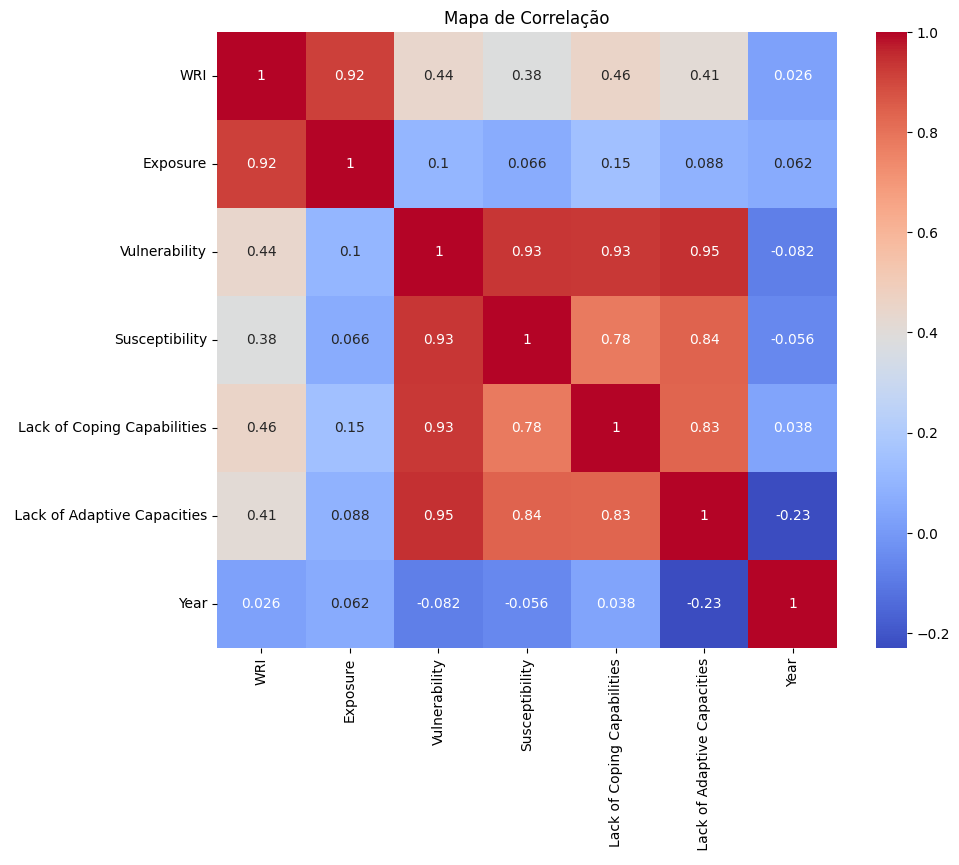

In [4]:
# Visualizar as primeiras linhas do dataset
print("🔍 Visualizando os dados:")
print(df.head())

# Informações gerais sobre o dataset
print("\n📊 Informações do dataset:")
print(df.info())

# Verificar dados ausentes
print("\n🔧 Verificando dados ausentes:")
print(df.isnull().sum())

# Estatísticas descritivas
print("\n📈 Estatísticas descritivas:")
print(df.describe())

# Visualizar correlação entre variáveis numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

## Treinamento de modelos de regressão

Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', 'Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='object')

🔹 Modelo: Random Forest
R²: 0.9814
RMSE: 0.7827
MAE: 0.1928

🔹 Modelo: XGBoost
R²: 0.9655
RMSE: 1.0671
MAE: 0.2438

🔸 Validação cruzada (XGBoost) - R² médio: 0.9824


<Figure size 800x500 with 0 Axes>

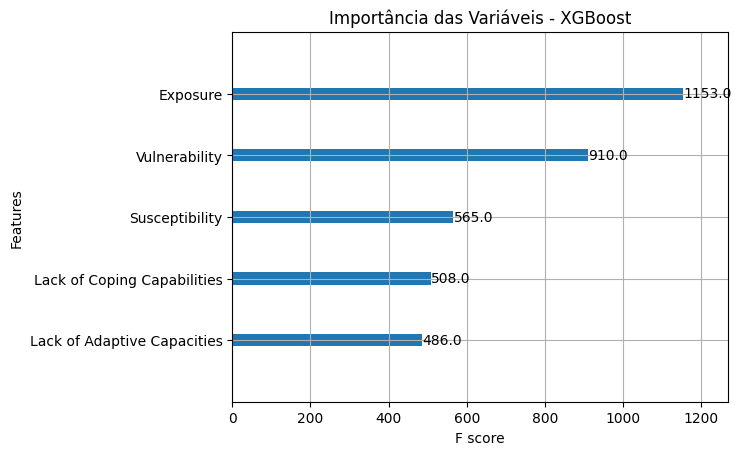

In [7]:
# 📥 Carregar dados
file_path = '/content/drive/MyDrive/ITDSPZ/world_risk_index.csv'
df = pd.read_csv(file_path)

# 🔧 Corrigir espaços nos nomes das colunas
df.columns = df.columns.str.strip()

# 🔍 Verificar colunas
print(df.columns)

# 🔧 Selecionar variáveis numéricas
features = [
    'Exposure',
    'Vulnerability',
    'Susceptibility',
    'Lack of Coping Capabilities',
    'Lack of Adaptive Capacities'
]
target = 'WRI'

X = df[features]
y = df[target]

# 🔀 Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 🚀 Treinar modelos
# 🔸 Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 🔸 XGBoost
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

# Avaliação dos modelos
def avaliar(y_true, y_pred, nome_modelo):
    print(f'\n🔹 Modelo: {nome_modelo}')
    print(f'R²: {r2_score(y_true, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')

avaliar(y_test, y_pred_rf, 'Random Forest')
avaliar(y_test, y_pred_xgb, 'XGBoost')

# Validação cruzada
scores = cross_val_score(xgbr, X, y, cv=5, scoring='r2')
print(f'\n🔸 Validação cruzada (XGBoost) - R² médio: {scores.mean():.4f}')

# Importância das variáveis (XGBoost)
plt.figure(figsize=(8,5))
xgb.plot_importance(xgbr)
plt.title('Importância das Variáveis - XGBoost')
plt.show()


## Salvando os modelos treinados

In [6]:
import joblib

# Salvar modelo Random Forest
joblib.dump(rf, 'modelo_random_forest.pkl')

# Salvar modelo XGBoost
joblib.dump(xgbr, 'modelo_xgboost.pkl')

print("✅ Modelos salvos com sucesso!")


✅ Modelos salvos com sucesso!
